## Predicting Outcomes: Decision Trees (Titanic) Project

This project focuses on decision trees and starts with the titanic data set.

First, separate the data into training and test sets. The test set should be 20% of the total data. 

Second, build a decision tree based on the training data. The defaults for building a tree are fine (gini impurity). Output the graph of the tree as in the notebooks we have looked at in class.

Third, produce a confusion matrix from the trees predictions on the test data. From the matrix calculate performance measures from the confusion matrix, especially f1 score. Look back at the tree and identify which branches resulted in false positives or false negatives. (You can include this commentary in a markdown cell).

Fourth, build a second decision tree. This tree will be restricted to have a max-depth of one. This pre-pruning results in a much smaller tree. Output a graph of this tree.

Fifth, produce a confusion matrix and calculate performance measures for this second tree. How much better or worse is this tree (in terms of accuracy, precision, recall, f1 score). 

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree # Decision tree induction
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split # used to make training & test sets
import graphviz # for visualizing trees
from sklearn.naive_bayes import GaussianNB # The naive bayes algorithm
from sklearn.neighbors import KNeighborsClassifier # The k-nearest-neighbors algorithm
from matplotlib.colors import ListedColormap # Create custom color maps

In [42]:
data = pd.read_csv("~/share/Datasets/titanic.tsv", sep="\t")
data.head()

,Class,Age,Sex,Survived
0,First,Adult,Male,Yes
1,First,Adult,Male,Yes
2,First,Adult,Male,Yes
3,First,Adult,Male,Yes
4,First,Adult,Male,Yes


In [43]:
# Replace categories with a numeric code
class_num = data["Class"].replace(['First', 'Second', 'Third', 'Crew'], [1, 2, 3, 4])
age_num = data["Age"].replace(['Adult', 'Child'], [1, 0])
sex_num = data["Sex"].replace(['Female', 'Male'], [1, 0])
survived_num = data["Survived"].replace(['Yes', 'No'], [1, 0])

numdata = pd.concat([class_num, age_num, sex_num, survived_num], axis=1)
numdata.head()

,Class,Age,Sex,Survived
0,1,1,0,1
1,1,1,0,1
2,1,1,0,1
3,1,1,0,1
4,1,1,0,1


In [44]:
#First, we change the categorical data set to numeric:

# Create training and test sets
training_set, test_set = train_test_split(numdata, test_size=0.20)

# Use the first two features for training
training_features = training_set.iloc[:, 0:3]
# Targets are at the end
training_targets = training_set.iloc[:, 3]

# Pull out the same features and targets from test set
testing_features = test_set.iloc[:, 0:3]
testing_targets = test_set.iloc[:, 3]

## INITIAL DECISION TREE WITH DEFAULT GINI BASED IMPURITY CRITERION

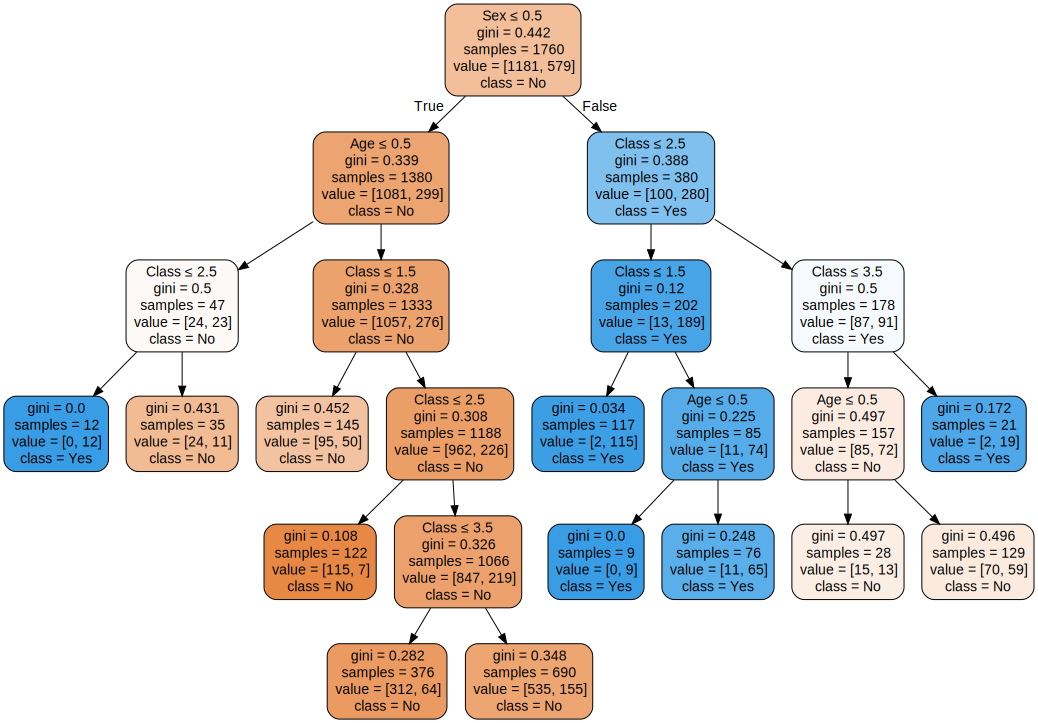

In [45]:
# Use Gini based impurity criterion for setting decision tree
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(training_features, training_targets)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                class_names=['No', 'Yes'],
                                feature_names=numdata.columns[0:3],
                                impurity=True,
                                filled=True, rounded=True,
                                special_characters=True) 


graph1 = graphviz.Source(dot_data)  
graph1

In [46]:
predictions = clf.predict(testing_features)
# Array for the Confusion Matrix CM:
cmdata = confusion_matrix(testing_targets, predictions)
cmdata

array([[304,   5],
       [ 82,  50]])

In [47]:
# Confusion matrix plotter from:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, without Normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion Matrix, without Normalization
[[304   5]
 [ 82  50]]
Normalized Confusion Matrix
[[0.98381877 0.01618123]
 [0.62121212 0.37878788]]


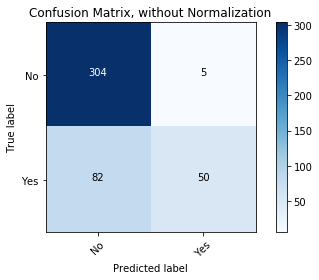

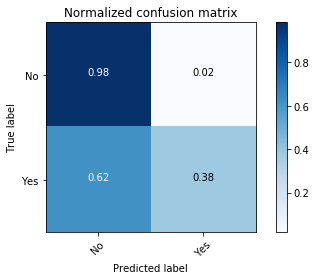

In [48]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cmdata, classes=["No", "Yes"],
                      title='Confusion Matrix, without Normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cmdata, classes=["No", "Yes"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [49]:
#Now, in order to calculate performance measures from the Confusion Matrix:
# Pull out each value
true_neg = cmdata[0,0]
false_pos = cmdata[0,1]
false_neg = cmdata[1,0]
true_pos = cmdata[1,1]

# Sums across
actual_pos = true_pos + false_neg
actual_neg = true_neg + false_pos

# Sums down
predicted_pos = true_pos + false_pos
predicted_neg = true_neg + false_neg

# Total sum
total = true_neg + true_pos + false_pos + false_neg

# Calculations across
TPR = true_pos / actual_pos # True positive rate or sensitivity or recall
FNR = false_neg / actual_pos # False negative rate
FPR = false_pos / actual_neg # False positive rate
TNR = true_neg / actual_neg # True negative rate or specificity

print("TPR:", TPR, "also known as sensitivity or recall")
print("FNR:", FNR)
print("FPR:", FPR)
print("TNR:", TNR, "also known as specificity")

# Calculations down
PPV = true_pos / predicted_pos # Positive predictive value or precision
FDR = false_pos / predicted_pos # False discovery rate
NPV = true_neg / predicted_neg # Negative predictive value
FOR = false_neg / predicted_neg # False omission rate

print("PPV:", PPV, "also known as precision")
print("FDR:", FDR)
print("NPV:", NPV)
print("FOR:", FOR)

# Other calculations
accuracy = (true_pos + true_neg) / total
prevalence = actual_pos / total
f1_score = (2 * TPR * PPV) / (TPR + PPV) # harmonic mean of precision & recall

print("Accuracy:", accuracy)
print("Prevalence:", prevalence)
print("F1 Score:", f1_score)

TPR: 0.3787878787878788 also known as sensitivity or recall
FNR: 0.6212121212121212
FPR: 0.016181229773462782
TNR: 0.9838187702265372 also known as specificity
PPV: 0.9090909090909091 also known as precision
FDR: 0.09090909090909091
NPV: 0.7875647668393783
FOR: 0.21243523316062177
Accuracy: 0.8027210884353742
Prevalence: 0.29931972789115646
F1 Score: 0.5347593582887701


Third, produce a confusion matrix from the trees predictions on the test data. From the matrix calculate performance measures from the confusion matrix, especially f1 score. Look back at the tree and identify which branches resulted in false positives or false negatives. (You can include this commentary in a markdown cell).

## PRE-PRUNED DECISION TREE WITH THE MAXIMUM DEPTH OF 1

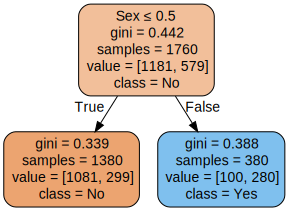

In [50]:
clf2 = tree.DecisionTreeClassifier(criterion="gini", max_depth=1)
clf2 = clf2.fit(training_features, training_targets)
dot_data = tree.export_graphviz(clf2, out_file=None, 
                                class_names=['No', 'Yes'],
                                feature_names=data.columns[0:3],
                                impurity=True,
                                filled=True, rounded=True,
                                special_characters=True) 


graph = graphviz.Source(dot_data)  
graph

In [51]:
predictions2 = clf2.predict(testing_features)
# Array for the Confusion Matrix CM:
cm2data = confusion_matrix(testing_targets, predictions2)
cm2data

array([[283,  26],
       [ 68,  64]])

Confusion Matrix, without Normalization
[[283  26]
 [ 68  64]]
Normalized Confusion Matrix
[[0.91585761 0.08414239]
 [0.51515152 0.48484848]]


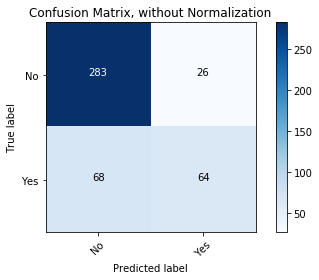

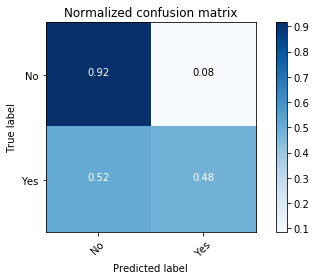

In [52]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm2data, classes=["No", "Yes"],
                      title='Confusion Matrix, without Normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm2data, classes=["No", "Yes"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [53]:
#Now, in order to calculate performance measures from the Confusion Matrix:
# Pull out each value
true_neg = cm2data[0,0]
false_pos = cm2data[0,1]
false_neg = cm2data[1,0]
true_pos = cm2data[1,1]

# Sums across
actual_pos = true_pos + false_neg
actual_neg = true_neg + false_pos

# Sums down
predicted_pos = true_pos + false_pos
predicted_neg = true_neg + false_neg

# Total sum
total = true_neg + true_pos + false_pos + false_neg

# Calculations across
TPR = true_pos / actual_pos # True positive rate or sensitivity or recall
FNR = false_neg / actual_pos # False negative rate
FPR = false_pos / actual_neg # False positive rate
TNR = true_neg / actual_neg # True negative rate or specificity

print("TPR:", TPR, "also known as sensitivity or recall")
print("FNR:", FNR)
print("FPR:", FPR)
print("TNR:", TNR, "also known as specificity")

# Calculations down
PPV = true_pos / predicted_pos # Positive predictive value or precision
FDR = false_pos / predicted_pos # False discovery rate
NPV = true_neg / predicted_neg # Negative predictive value
FOR = false_neg / predicted_neg # False omission rate

print("PPV:", PPV, "also known as precision")
print("FDR:", FDR)
print("NPV:", NPV)
print("FOR:", FOR)

# Other calculations
accuracy = (true_pos + true_neg) / total
prevalence = actual_pos / total
f1_score = (2 * TPR * PPV) / (TPR + PPV) # harmonic mean of precision & recall

print("Accuracy:", accuracy)
print("Prevalence:", prevalence)
print("F1 Score:", f1_score)

TPR: 0.48484848484848486 also known as sensitivity or recall
FNR: 0.5151515151515151
FPR: 0.08414239482200647
TNR: 0.9158576051779935 also known as specificity
PPV: 0.7111111111111111 also known as precision
FDR: 0.28888888888888886
NPV: 0.8062678062678063
FOR: 0.19373219373219372
Accuracy: 0.7868480725623582
Prevalence: 0.29931972789115646
F1 Score: 0.5765765765765766


## COMPARISON BETWEEN FIRST DECISION TREE AND SECOND PRE-PRUNED DECISION TREE: 
(The values are based on the time that I run the codes and they might slightly change given that the training and test sets change every time we run the codes.)
### FIRST TREE

Accuracy: 0.8027210884353742

Precision: 0.9090909090909091

Recall: 0.3787878787878788

F1 Score: 0.5347593582887701

### SECOND TREE
Accuracy: 0.7755102040816326

Precision: 0.7111111111111111

Recall: 0.48484848484848486

F1 Score: 0.5765765765765766

Here, we see better F1 Scores and Recall for the pre-pruned decision tree than the initial decision tree. However, the accuracy and precision is much better for the first decision tree than the second (pre-pruned) decision tree. This makes sense because the process of pruning trades accuracy of the data model on the training data with simplicity in the hope that this will result in a better expected predictive accuracy on the unseen instances.